In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("/content/drive/MyDrive/Datasets-20241201T040656Z-001/Datasets/diabetes.csv")
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Regression task


In [ ]:
blood_pressure_data = data.copy()
blood_pressure_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = blood_pressure_data.drop(columns=['BloodPressure']).values
x

array([[  6.   , 148.   ,  35.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  29.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,   0.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  23.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,   0.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  31.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
y = blood_pressure_data['BloodPressure'].values
y

array([ 72,  66,  64,  66,  40,  74,  50,   0,  70,  96,  92,  74,  80,
        60,  72,   0,  84,  74,  30,  70,  88,  84,  90,  80,  94,  70,
        76,  66,  82,  92,  75,  76,  58,  92,  78,  60,  76,  76,  68,
        72,  64,  84,  92, 110,  64,  66,  56,  70,  66,   0,  80,  50,
        66,  90,  66,  50,  68,  88,  82,  64,   0,  72,  62,  58,  66,
        74,  88,  92,  66,  85,  66,  64,  90,  86,  75,  48,  78,  72,
         0,  66,  44,   0,  78,  65, 108,  74,  72,  68,  70,  68,  55,
        80,  78,  72,  82,  72,  62,  48,  50,  90,  72,  60,  96,  72,
        65,  56, 122,  58,  58,  85,  72,  62,  76,  62,  54,  92,  74,
        48,  60,  76,  76,  64,  74,  80,  76,  30,  70,  58,  88,  84,
        70,  56,  64,  74,  68,  60,  70,  60,  80,  72,  78,  82,  52,
        66,  62,  75,  80,  64,  78,  70,  74,  65,  86,  82,  78,  88,
        52,  56,  74,  72,  90,  74,  80,  64,  88,  74,  66,  68,  66,
        90,  82,  70,   0,  60,  64,  72,  78, 110,  78,  82,  8

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.90726993, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636,  0.53090156, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -1.28821221, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.15453319, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -1.28821221, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.65635768, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [ ]:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2, random_state=42)
print("X_train:", X_train_reg)
print("X_test:", X_test_reg)
print("y_train:", y_train_reg)
print("y_test:", y_test_reg)

X_train: [[-0.54791859 -1.15469351 -1.28821221 ... -0.50700636 -1.04154944
  -0.73212021]
 [ 1.53084665 -0.27837344  0.21726125 ...  2.44666971  1.4259954
   1.36589591]
 [-0.84488505  0.56664949 -0.09637905 ...  0.55003518 -0.95646168
  -0.73212021]
 ...
 [ 1.82781311 -0.62264204  1.03272605 ...  2.00573238  0.40494237
   1.36589591]
 [-1.14185152  0.62924378 -1.28821221 ... -0.8059981  -0.36084741
   1.36589591]
 [-1.14185152  0.12848945 -1.28821221 ... -0.63385134 -1.04154944
  -0.73212021]]
X_test: [[ 0.63994726 -0.71653347  0.7818138  ... -0.1264714   0.83038113
  -0.73212021]
 [-0.54791859 -0.27837344  0.71908574 ... -0.97814487 -1.04154944
  -0.73212021]
 [-0.54791859 -0.40356202 -1.28821221 ... -0.94794368 -1.04154944
  -0.73212021]
 ...
 [ 1.23388019 -0.81042491 -1.28821221 ...  0.03963513  2.02160968
  -0.73212021]
 [-0.54791859  0.7857295   1.09545411 ... -0.40734244 -0.36084741
   1.36589591]
 [ 1.23388019 -1.46766496  1.22091023 ...  0.70406123  0.49003012
  -0.73212021]]


In [ ]:
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train_reg, y_train_reg)

y_pred_log_reg = log_reg_model.predict(X_test_reg)
print("Logistic Regression Results")
print(classification_report(y_test_reg, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test_reg, y_pred_log_reg)}")

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.20      0.36      0.26        11
          48       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         2
          54       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         6
          60       0.00      0.00      0.00        11
          62       0.13      0.33      0.19         6
          64       0.10      0.43      0.17         7
          65       0.00      0.00      0.00         3
          66       0.00      0.00      0.00         6
          68       0.00      0.00      0.00         5
          70       0.14      0.09      0.11        11
          72       0.14      0.10      0.12        10
          74       0.00      0.00      0.00         8
          75       0.00      0.00      0.00         4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_reg, y_train_reg)

y_pred_knn = knn_model.predict(X_test_reg)
print(classification_report(y_test_reg, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test_reg, y_pred_knn)}")

              precision    recall  f1-score   support

           0       0.25      0.55      0.34        11
          24       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         0
          48       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         2
          54       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         6
          60       0.00      0.00      0.00        11
          61       0.00      0.00      0.00         0
          62       0.00      0.00      0.00         6
          64       0.08      0.14      0.10         7
          65       0.00      0.00      0.00         3
          66       0.14      0.17      0.15         6
          68       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

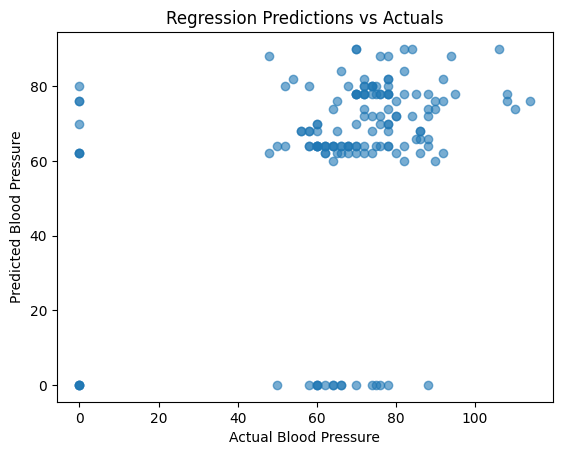

In [ ]:
y_pred_reg = log_reg_model.predict(X_test_reg)

plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.title('Regression Predictions vs Actuals')
plt.show()


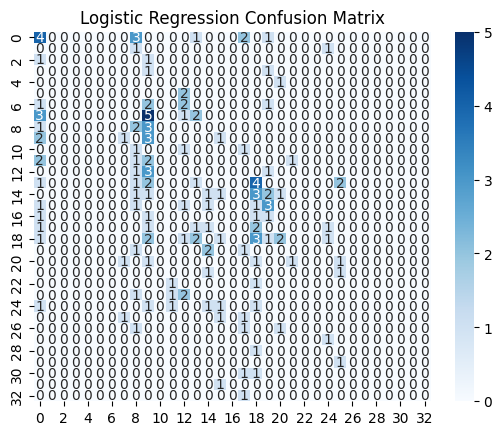

In [ ]:
# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test_reg, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()



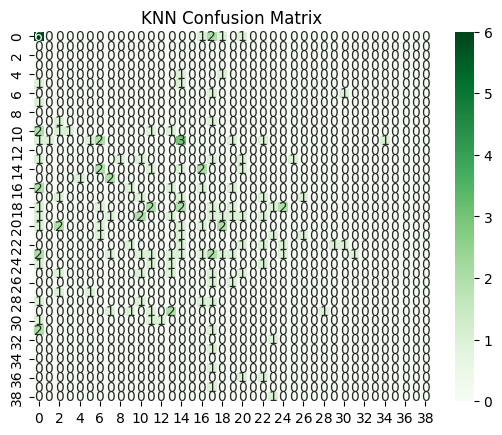

In [ ]:
# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test_reg, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('KNN Confusion Matrix')
plt.show()